In [179]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import random
import time

In [153]:
def make_graph_nx(node_list, target_nodes, edge_list):
    G = nx.Graph()
    labels = {}
    for node in node_list:
        labels[node] = node
        G.add_node(node)

    G.add_node(target_nodes[0])
    labels[target_nodes[0]] = target_nodes[0]
    G.add_node(target_nodes[1])
    labels[target_nodes[1]] = target_nodes[1]

    for edge in edge_list:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.kamada_kawai_layout(G)

    return G, pos, labels


def draw_graph(graph, pos, nodes, targets, labels):
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edge)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


def draw_shortest_path_graph(graph, pos, nodes, targets, labels, path_nodes):
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_edge)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='g', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='r', node_size=500)
    nx.draw_networkx_nodes(G, pos, nodelist=path_nodes, node_color='y', node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)


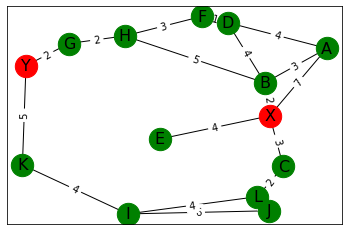

In [149]:
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
targets = ['X', 'Y']
edges = [
    ('X', 'A', 7),
    ('X', 'B', 2),
    ('X', 'C', 3),
    ('X', 'E', 4),
    ('A', 'B', 3),
    ('A', 'D', 4),
    ('B', 'D', 4),
    ('B', 'H', 5),
    ('C', 'L', 2),
    ('D', 'F', 1),
    ('F', 'H', 3),
    ('G', 'H', 2),
    ('G', 'Y', 2),
    ('I', 'J', 6),
    ('I', 'K', 4),
    ('I', 'L', 4),
    ('J', 'L', 1),
    ('K', 'Y', 5),
]

G, pos, labels = make_graph_nx(nodes, targets, edges)
draw_graph(G, pos, nodes, targets, labels)

In [164]:
pred_dijkstra, dist_dijkstra = nx.dijkstra_predecessor_and_distance(G, 'X')

data_dijkstra = []
for key, val in sorted(dist_dijkstra.items()):
    data_dijkstra.append(['X', key, val, pred_dijkstra[key]])

df_dijkstra = pd.DataFrame(data_dijkstra, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_dijkstra

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [170]:
shortest_path_dijkstra = nx.dijkstra_path(G, 'X', 'Y', weight='weight')
path_nodes_dijkstra = shortest_path_dijkstra[1:len(shortest_path_dijkstra)-1]
print(shortest_path_dijkstra)

['X', 'B', 'H', 'G', 'Y']


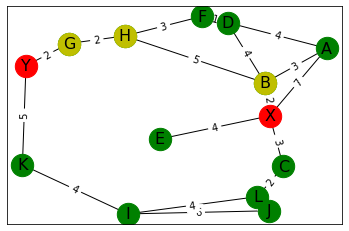

In [160]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_dijkstra)

In [165]:
pred_bf, dist_bf = nx.bellman_ford_predecessor_and_distance(G, 'X')

data_bf = []
for key, val in sorted(dist_bf.items()):
    data_bf.append(['X', key, val, pred_bf[key]])

df_bf = pd.DataFrame(data_bf, columns = ['Source', 'Target', 'Shortest Distance', 'Predecessor'])
df_bf

,Source,Target,Shortest Distance,Predecessor
0,X,A,5,[B]
1,X,B,2,[X]
2,X,C,3,[X]
3,X,D,6,[B]
4,X,E,4,[X]
5,X,F,7,[D]
6,X,G,9,[H]
7,X,H,7,[B]
8,X,I,9,[L]
9,X,J,6,[L]


In [171]:
shortest_path_bf = nx.bellman_ford_path(G, 'X', 'Y', weight='weight')
path_nodes_bf = shortest_path_bf[1:len(shortest_path_bf)-1]
print(shortest_path_bf)
print(path_nodes_bf)

['X', 'B', 'H', 'G', 'Y']
['B', 'H', 'G']


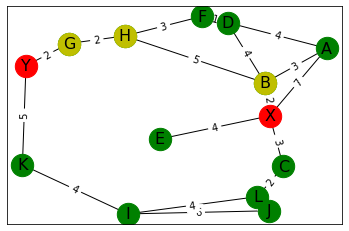

In [172]:
draw_shortest_path_graph(G, pos, nodes, targets, labels, path_nodes_bf)

In [190]:
random_graphs = []

for i in range(1000):
    g = nx.gnm_random_graph(20,20)
    for (u, v) in g.edges():
        g.edges[u,v]['weight'] = random.randint(0,10)
    random_graphs.append(g)

In [191]:
def calc_dijkstra(g):
    start = time.time()
    pred, dist = nx.dijkstra_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_bellman_ford(g):
    start = time.time()
    pred, dist = nx.bellman_ford_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

def calc_floyd_warshall(g):
    start = time.time()
    pred, dist = nx.floyd_warshall_predecessor_and_distance(g, 0)
    end = time.time()
    time_n = end - start
    return time_n

data = []
for graph in random_graphs:
    time_d = calc_dijkstra(graph)
    time_bf = calc_bellman_ford(graph)
    time_fw = calc_floyd_warshall(graph)
    data.append([time_d, time_bf, time_fw])
    
    

In [192]:
time_df = pd.DataFrame(data, columns=['Dijkstra', 'Bellman-Ford', 'Floyd-Warshall'])
time_df

,Dijkstra,Bellman-Ford,Floyd-Warshall
0,0.000076,0.000174,0.001935
1,0.000021,0.000081,0.007937
2,0.000143,0.000292,0.003906
3,0.000172,0.000655,0.004663
4,0.000080,0.000187,0.001545
...,...,...,...
995,0.000193,0.000318,0.001737
996,0.000061,0.000160,0.001461
997,0.000014,0.000057,0.001393
998,0.000049,0.000140,0.001389
